<a href="https://colab.research.google.com/github/buunq1977/CodexploreRepo/blob/main/M4.1.2d_%5BLecture%5D_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VISUALIZING WITH MATPLOTLIB**
<img src="https://matplotlib.org/_static/logo2.png" alt="matplotlib" width="50%"/>


Matplotlib is a package for data visualization in Python. The library is built on NumPy arrays, and designed to work with the broader SciPy stack.

One of Matplotlib’s most important features is its **ability to play well with many operating systems and graphics backends**. Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish. This cross-platform, everything-to-everyone approach has been one of the great strengths of Matplotlib. It has led to a large user base, which in turn has led to an active developer base and Matplotlib’s powerful tools and ubiquity within the scientific Python world.

Matplotlib is  designed to help users to visualize data as easily as possible, with all the necessary control -- that is, by using relatively high-level commands most of the time, and still have the ability to use the low-level commands when needed.

Therefore, everything in matplotlib is organized in a hierarchy. At the top of the hierarchy is the matplotlib "state-machine environment" which is provided by the [`matplotlib.pyplot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot) module. At this level, simple functions are used to add plot elements (lines, images, text, etc.) to the current axes in the current figure.

In this course, we will learn to use Matplotlib alongside with Seaborn to stylize the charts.

<img src='https://i.imgur.com/O4mBgbJ.png'>

## 0. Import

In [ ]:
# Import matplotlib pyplot

import matplotlib.pyplot as plt

`matplotlib.pyplot` is a collection of command style functions that make matplotlib work like **MATLAB**. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

In [ ]:
# Import other libraries

import pandas as pd
import seaborn as sns

In [ ]:
# Load data

df = pd.read_csv(
    "https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/titanic.csv"
)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Multiple Subplots

During the process of visualizing data, Matplotlib will first innitiate a figure. This figure serves as a canvas, on which subplots (axes) will be drawn.

❗️ Notice that, we do not draw directly onto the figure, but on subplots.

❗️ By default, one figure with one subplot will be created if there is no instruction on layout given.

<img src='https://i.imgur.com/AaqxaKy.png' width=600>

In [ ]:
# Create a figure

plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

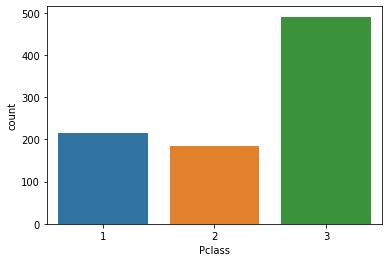

In [ ]:
# Create a figure with one subplot by default
# And draw on it

plt.figure()
sns.countplot(data=df, x="Pclass")
plt.show()

- Notice that the syntax of matplotlib is executed top down. User has to create a figure first, before drawing a chart and then `plt.show` to display all the open figures.

- `plt.figure` also allows users to adjust the size with specific width and height measurements in inches.

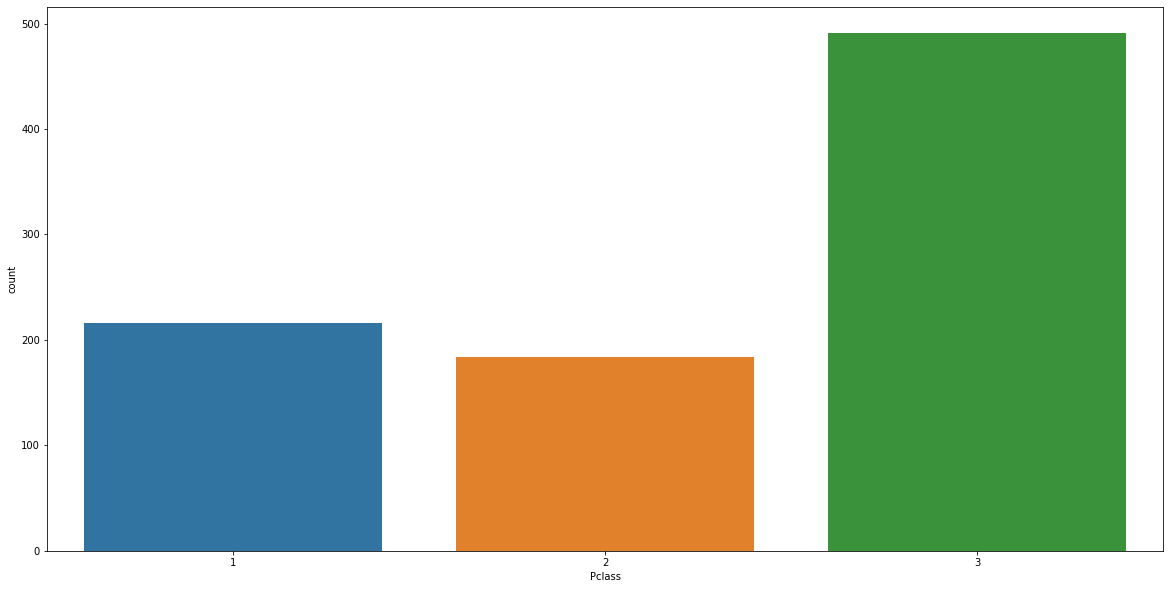

In [ ]:
# Make the figure larger
# by inches

plt.figure(figsize=(20, 10))
sns.countplot(data=df, x="Pclass")
plt.show()

To create multiple subplots in a figure, simply use `plt.subplot`. The syntax allows users to specify the layout with

- number of rows
- number of columns
- index of the drawing chart (count from 1)

For example:

<img src='https://i.imgur.com/MXKt1jC.png'>

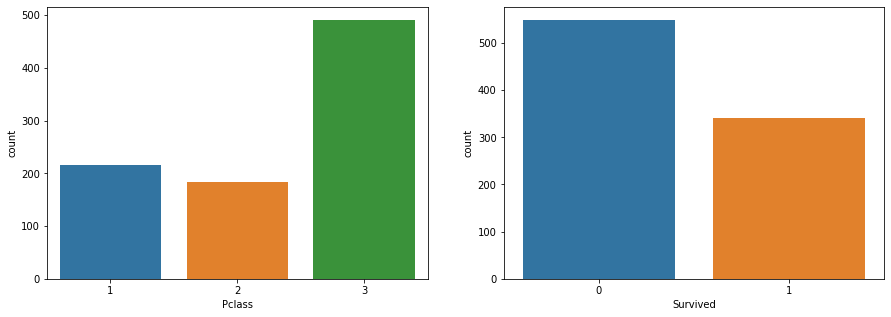

In [ ]:
# Innitiate a figure
plt.figure(figsize=(15, 5))

# Point to the first subplot
# First subplot is in the layout of 1 row, 2 columns, first slot.
plt.subplot(121)
sns.countplot(data=df, x="Pclass")

# Point to the first subplot
# Second subplot is in the layout of 1 row, 2 columns, second slot.
plt.subplot(122)
sns.countplot(data=df, x="Survived")

plt.show()

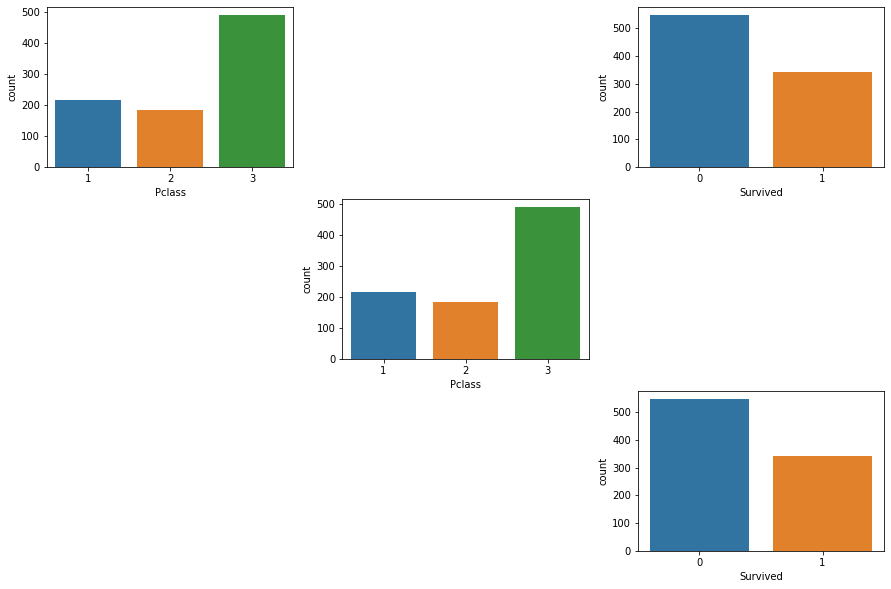

In [ ]:
# YOUR TURN: Recreate the below visualization layout with charts as countplots of Pclass and Survived.
# YOUR CODE HERE

In [ ]:
# @title Solution

# Innitiate a figure
plt.figure(figsize=(15, 10))

# Point to the 1st subplot
# First subplot is in the layout of 3 rows, 3 columns, first slot.
plt.subplot(331)
sns.countplot(data=df, x="Pclass")

# Point to the 3rd subplot
# The subplot is in the layout of 3 rows, 3 columns, 3rd slot.
plt.subplot(333)
sns.countplot(data=df, x="Survived")

# Point to the 5th subplot
# The subplot is in the layout of 3 rows, 3 columns, 5th slot.
plt.subplot(335)
sns.countplot(data=df, x="Pclass")

# Point to the 9th subplot
# The subplot is in the layout of 3 rows, 3 columns, 9th slot.
plt.subplot(339)
sns.countplot(data=df, x="Survived")

plt.show()

The syntax in matplotlib in hierachy. Anything that is written under a subplot call will be drawn on that subplot.

In [ ]:
mean_fare_by_survived = df.groupby("Survived")["Fare"].mean().reset_index()
mean_fare_by_survived

,Survived,Fare
0,0,22.117887
1,1,48.395408


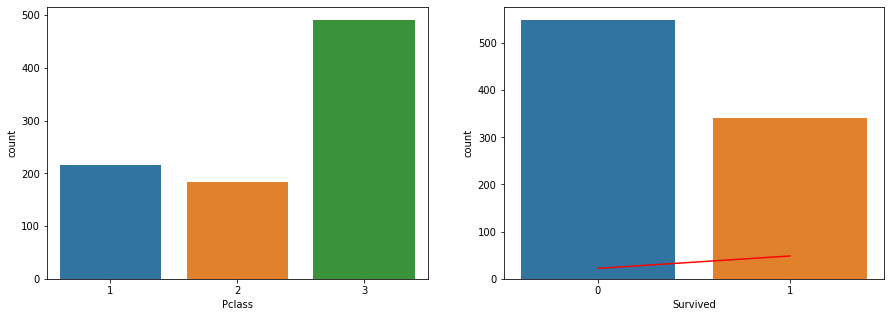

In [ ]:
plt.figure(figsize=(15, 5))

# Specify first subplot
plt.subplot(121)
sns.countplot(data=df, x="Pclass")

# 2nd subplot will have both countplot and lineplot
# Because both are specified under subplot 122
plt.subplot(122)
sns.countplot(data=df, x="Survived")
sns.lineplot(data=mean_fare_by_survived, x="Survived", y="Fare", color="red")

plt.show()

In case we have multiple charts on one subplot, it's important to split the metrics into dual axis. For that task, we can use
- `plt.twinx()` to create dual vertical axis.
- `plt.twiny()` to create dual horizontal axis.

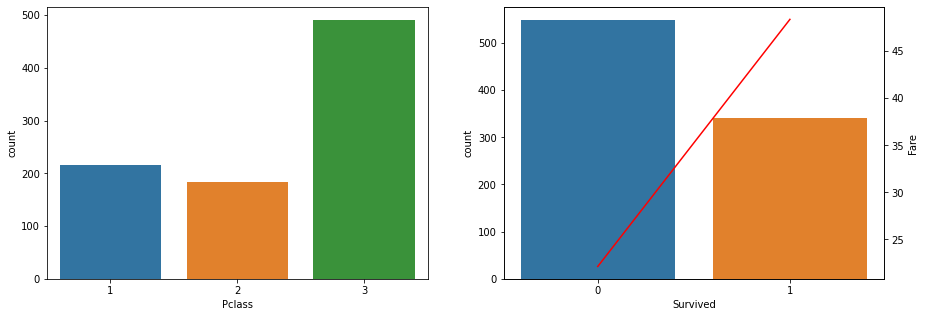

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.countplot(data=df, x="Pclass")

# Simply place the twinx between two charts.
# Notice how the line changes because the scale of axis is changed.
plt.subplot(122)
sns.countplot(data=df, x="Survived")
plt.twinx()
sns.lineplot(data=mean_fare_by_survived, x="Survived", y="Fare", color="red")

plt.show()

While dealing with multiple subplots, we need different titles to distinguish them. Users can choose between:

- `plt.suptitle`: To name the entire figure
- `plt.title`: To name a subplot

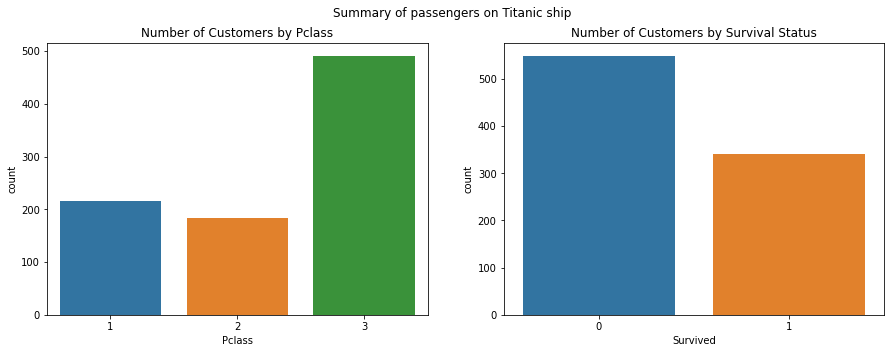

In [ ]:
plt.figure(figsize=(15, 5))
plt.suptitle("Summary of passengers on Titanic ship")

plt.subplot(121)
sns.countplot(data=df, x="Pclass")
plt.title("Number of Customers by Pclass")

plt.subplot(122)
sns.countplot(data=df, x="Survived")
plt.title("Number of Customers by Survival Status")

plt.show()

Now, we are able to create a visualization with multiple subplots. A quick summary:

👉 To create figure and subplots:

```plt.figure()``` ▸ https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html

```plt.subplot()``` ▸ https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html

👉 To create dual axis:

`plt.twinx()`

`plt.twiny()`

👉 To add title:

```plt.suptitle()``` ▸ https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html

```plt.title()``` ▸ https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html

## 2. Customize a Chart

<img src="https://matplotlib.org/_images/anatomy.png" alt="drawing" width="600">

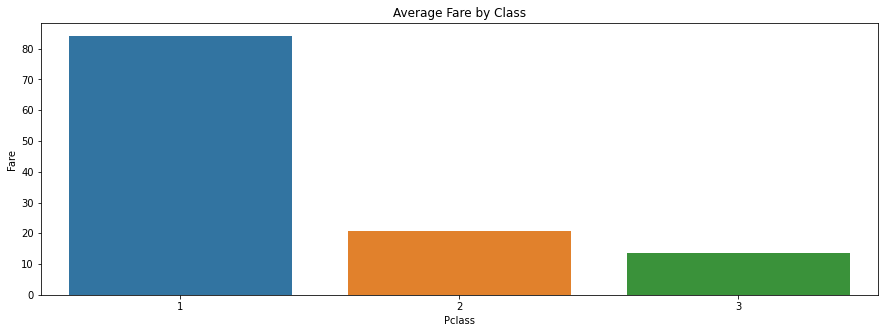

In [ ]:
# Visualizing average fare by Pclass

# Calculate the plot data
mean_fare_by_pclass = df.groupby("Pclass")["Fare"].mean().reset_index()

# Visualize
plt.figure(figsize=(15, 5))
sns.barplot(data=mean_fare_by_pclass, x="Pclass", y="Fare")

# Customize
plt.title("Average Fare by Class")

plt.show()

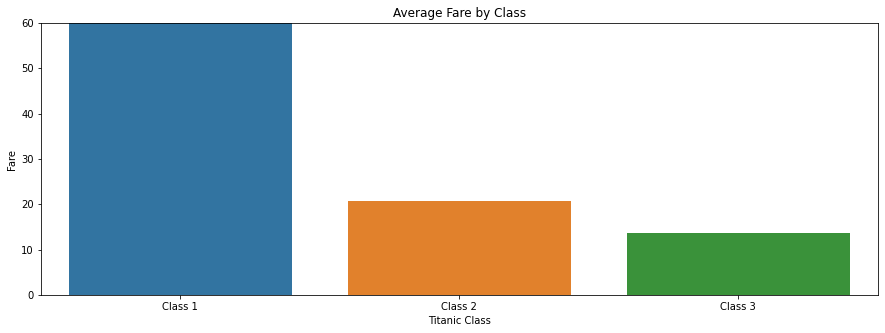

In [ ]:
# Customize the chart
plt.figure(figsize=(15, 5))
sns.barplot(data=mean_fare_by_pclass, x="Pclass", y="Fare")

plt.title("Average Fare by Class")

# ------ Change label of x-axis ------
plt.xlabel("Titanic Class")

# ------ Change ticks of x-axis ------
# ticks: specify index of ticks (count from 0)
# labels: new labels for the ticks
plt.xticks(ticks=[0, 1, 2], labels=["Class 1", "Class 2", "Class 3"])

# ------ Change limit of y-axis ------
# The new y-axis ranges from 0 to 60
plt.ylim(0, 60)

plt.show()

In [ ]:
list(range(0, 85, 5))

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]

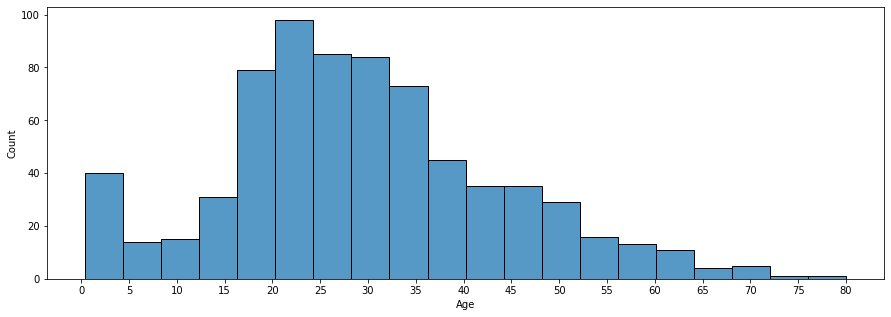

In [ ]:
# Example 2: Adjust labels for continuous axis

plt.figure(figsize=(15, 5))
sns.histplot(data=df, x="Age")
plt.xticks(ticks=list(range(0, 85, 5)))

plt.show()

## 3. Add Text

Oftentimes, we want to introduce text to chart as tooltips to explain the chart better. Matplotlib has the `plt.text` syntax that offers a very flexible way to edit the text.

Some important parameters:

- `x`: x location
- `y`: y location
- `s`: message in string
- `horizontalalignment` or `ha`: "center", "right", or "left"
- `verticalalignment` or `va`: 'center', 'top', 'bottom', 'baseline', 'center_baseline'
- Furthermore, any other formatting parameter can be passed in as a dictionary. Please refer in the link ▸ [```plt.text( )```](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html)

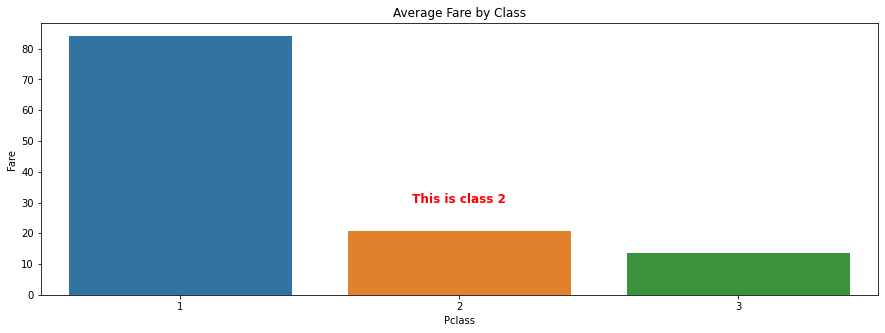

In [ ]:
mean_fare_by_pclass = df.groupby("Pclass")["Fare"].mean().reset_index()

plt.figure(figsize=(15, 5))
sns.barplot(data=mean_fare_by_pclass, x="Pclass", y="Fare")
plt.title("Average Fare by Class")


# ----- Add Text -----
plt.text(
    x=1,
    y=30,
    s="This is class 2",
    ha="center",
    fontsize="large",
    fontweight="bold",
    color="red",
)

plt.show()

🙋🏻‍♂️ **YOUR TURN:** Find a way to put number labels on top of each bar.

In [ ]:
mean_fare_by_pclass

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


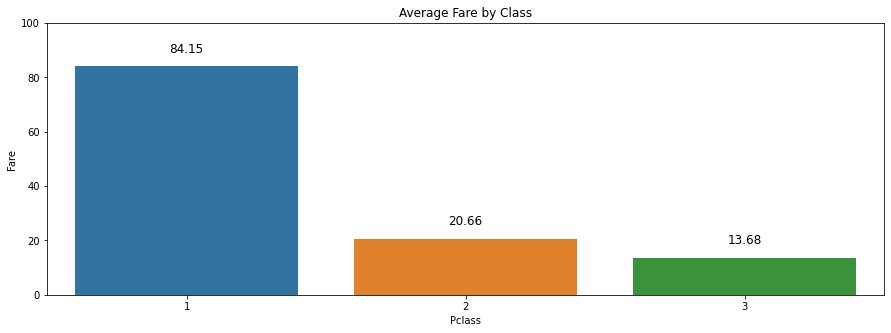

In [ ]:
# YOUR CODE HERE

In [ ]:
# @title Solution

plt.figure(figsize=(15, 5))
sns.barplot(data=mean_fare_by_pclass, x="Pclass", y="Fare")
plt.title("Average Fare by Class")

for i in range(mean_fare_by_pclass.shape[0]):
    plt.text(
        x=i,
        y=mean_fare_by_pclass.loc[i, "Fare"] + 5,
        s=round(mean_fare_by_pclass.loc[i, "Fare"], 2),
        ha="center",
        fontsize="large",
    )

plt.ylim(0, 100)
plt.show()

**✲ Extra**: We can also add a **reference line** using `plt.axhline` or `plt.axvline` to highlight any threshold or comparision if any.

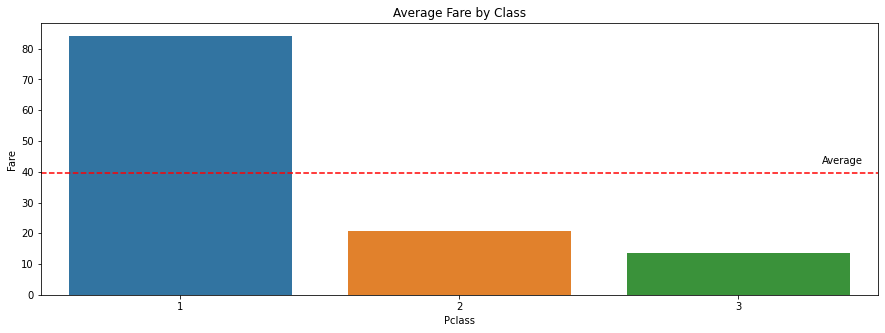

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=mean_fare_by_pclass, x="Pclass", y="Fare")
plt.title("Average Fare by Class")
plt.axhline(y=mean_fare_by_pclass["Fare"].mean(), color="red", linestyle="--")
plt.text(x=2.3, y=mean_fare_by_pclass["Fare"].mean() + 3, s="Average")
plt.show()

## 4. *Extra* - Styling and Export

Matplotlib also offers a wide range of visualization color palettes to improve the aesthetic of your visualization. You can refer to this link for available themes: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

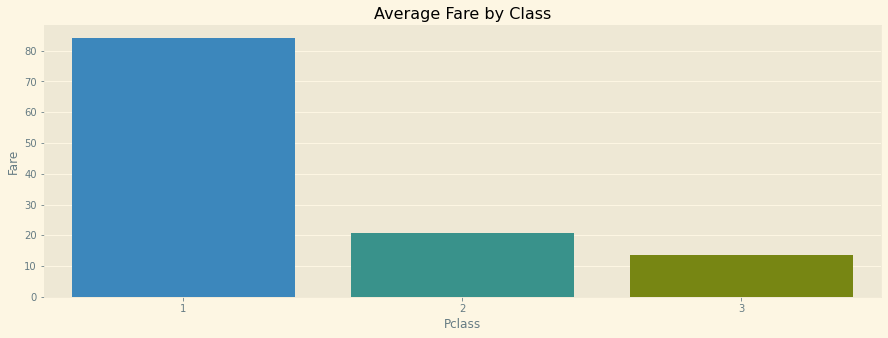

In [ ]:
# Set up the theme
plt.style.use("Solarize_Light2")

# Visualize
plt.figure(figsize=(15, 5))
sns.barplot(data=mean_fare_by_pclass, x="Pclass", y="Fare")
plt.title("Average Fare by Class")
plt.show()

We can use the `figure.Figure.savefig()` in order to save the figure to disk. Note that there are several useful flags we'll show below:

* `transparent=True` makes the background of the saved figure transparent if the format supports it.
* `dpi=80` controls the resolution (dots per square inch) of the output.
* `bbox_inches="tight"` fits the bounds of the figure to our plot.

Read more at: https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.savefig.html

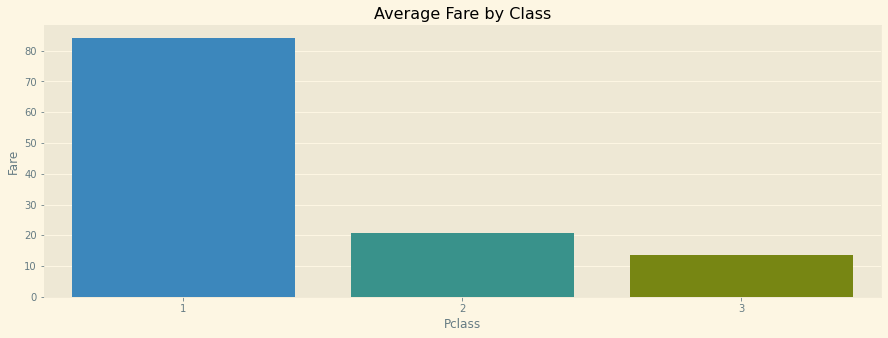

In [ ]:
# Visualize
fig = plt.figure(figsize=(15, 5))
sns.barplot(data=mean_fare_by_pclass, x="Pclass", y="Fare")
plt.title("Average Fare by Class")
plt.show()

In [ ]:
# Save the figure

fig.savefig("fare.png", transparent=False, dpi=80, bbox_inches="tight")

## SUMMARY

```python
# --------- Import ---------
import matplotlib.pyplot as plt

# --------- Create figure and subplot ---------
plt.figure(figsize=(10, 15))
plt.subplot(121)

# --------- Shared axis ---------
plt.twinx()
plt.twiny()

# --------- Add title ---------
plt.suptitle()
plt.title()

# --------- Format axis ---------
plt.xlabel()
plt.ylabel()

plt.xticks()
plt.yticks()

plt.xlim()
plt.ylim()

# --------- Add text ---------
plt.text()

# --------- Add reference line ---------
plt.axhline()
plt.axvline()

# --------- Change theme ---------
plt.style.use()

# --------- Export ---------
fig = plt.figure()
...
fig.savefig('test.png')
```